In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import isodate

from app.constants import (
    TURKEY_VIDEOS_PATH_AFTER as turkey_videos_after_path,
    TURKEY_VIDEOS_PATH_BEFORE as turkey_videos_before_path,
    REQUIRED_PROPERTIES as required_properties
)
from app.helpers import read_data_from_file, simplify_videos_data

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

In [42]:
before_covid_videos = read_data_from_file(turkey_videos_before_path)
simplified_before_covid_videos = simplify_videos_data(before_covid_videos, required_properties)

after_covid_videos = read_data_from_file(turkey_videos_after_path)
simplified_after_covid_videos = simplify_videos_data(after_covid_videos, required_properties)

In [68]:
before = pd.DataFrame(simplified_before_covid_videos)
after = pd.DataFrame(simplified_after_covid_videos)

after['publishedAt'] = pd.to_datetime(after['publishedAt'])
before['publishedAt'] = pd.to_datetime(before['publishedAt'])

after = after.sort_values('publishedAt', ascending=True)
before = before.sort_values('publishedAt', ascending=True)

after_like_count = after.copy()
before_like_count = before.copy()
after_view_count = after.copy()
before_view_count = before.copy()
after_comment_count = after.copy()
before_comment_count = before.copy()
after_dislike_count = after.copy()
before_dislike_count = before.copy()

In [50]:
category_count_before = before['categoryName'].value_counts()
category_count_after = after['categoryName'].value_counts()

category_count_before

People & Blogs           148
Music                     82
Travel & Events           63
Howto & Style             62
Education                 57
Film & Animation          38
News & Politics           32
Entertainment             27
Science & Technology      22
Sports                     8
Autos & Vehicles           6
Nonprofits & Activism      6
Gaming                     4
Pets & Animals             1
Name: categoryName, dtype: int64

<AxesSubplot:>

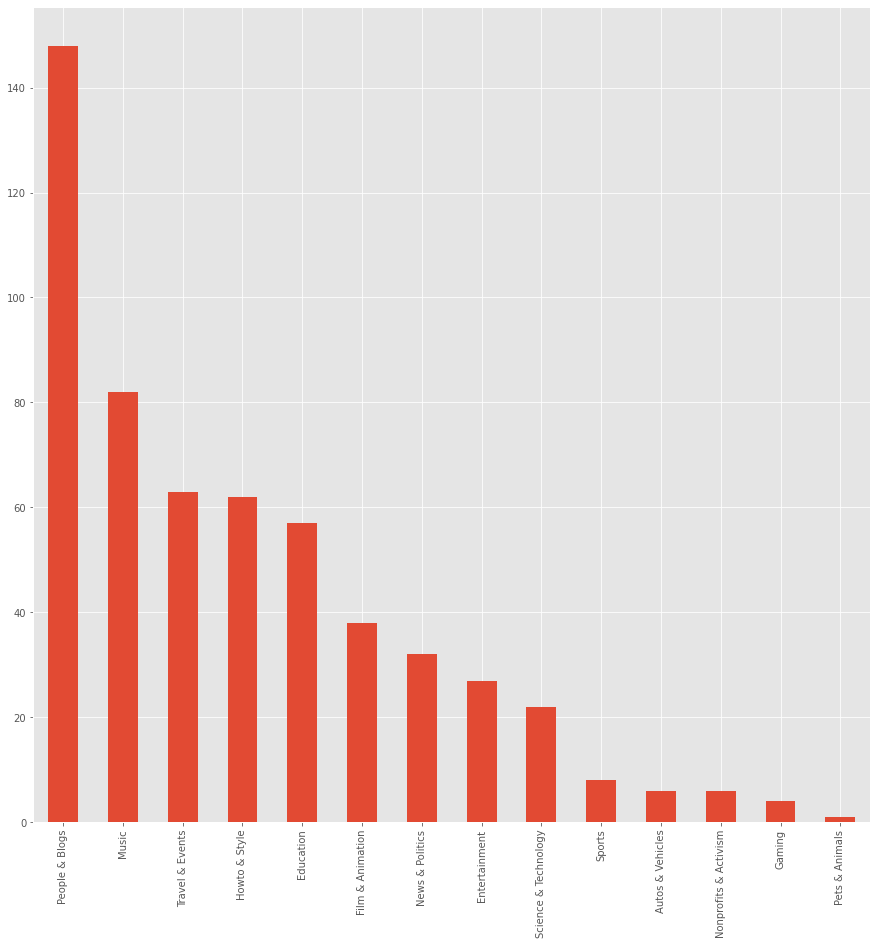

In [51]:
category_count_before.plot(kind='bar')

<AxesSubplot:>

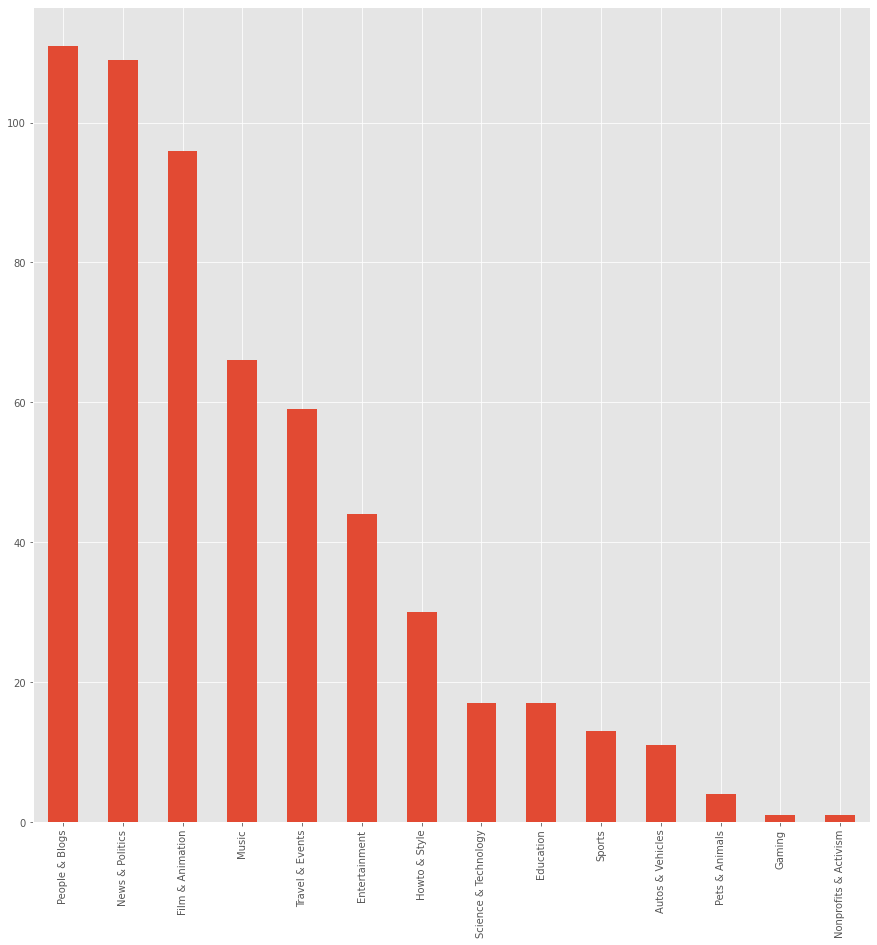

In [52]:
category_count_after.plot(kind='bar')

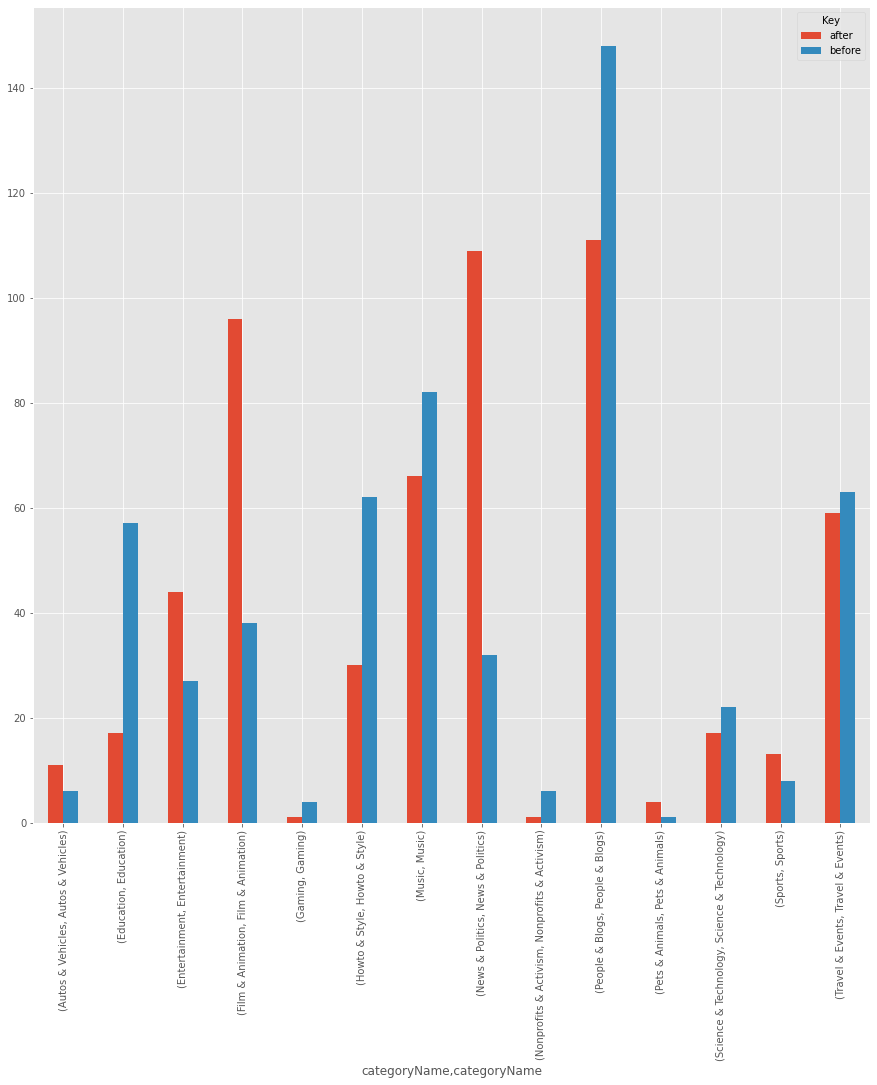

In [47]:
# compare categor
before['Key'] = 'before'
after['Key'] = 'after'

DF = pd.concat([before,after],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])
DFGroup['categoryName'].value_counts()

DFGPlot = DFGroup['categoryName'].value_counts().unstack('Key').plot(kind='bar')

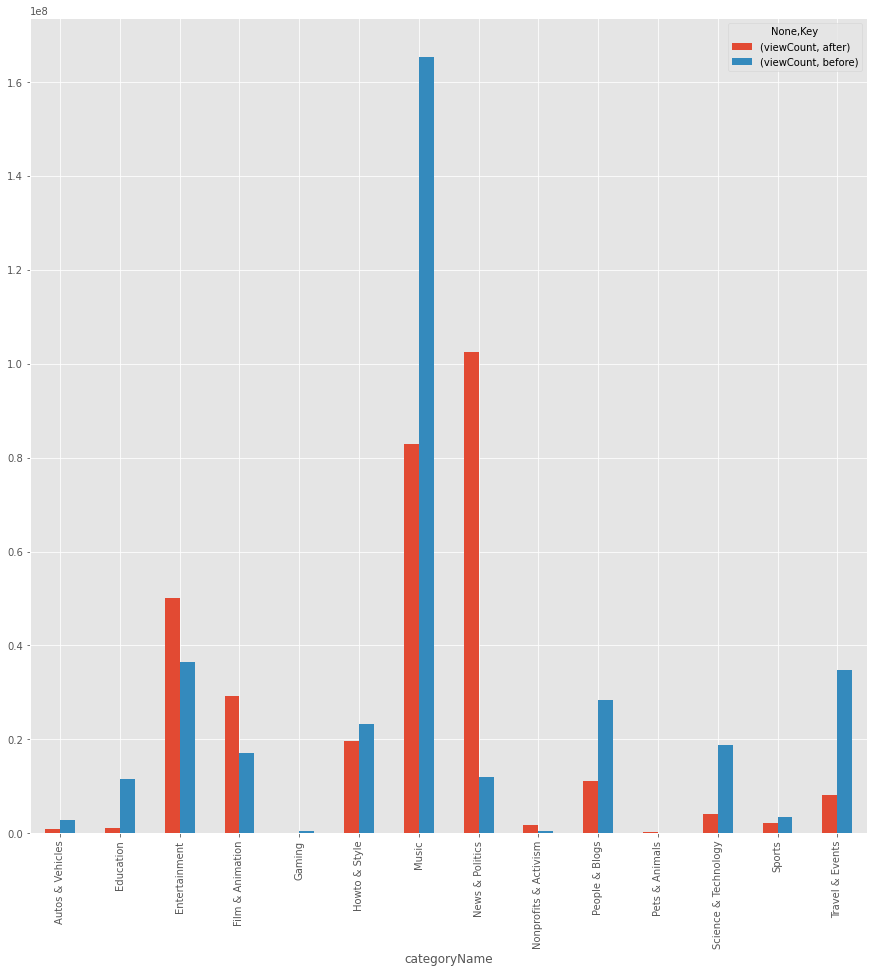

In [48]:
# compare category count according to viewcount
before_view_count['Key'] = 'before'
after_view_count['Key'] = 'after'
before_view_count['viewCount'] = pd.to_numeric(before_view_count['viewCount'])
after_view_count['viewCount'] = pd.to_numeric(after_view_count['viewCount'])

DF = pd.concat([before_view_count,after_view_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

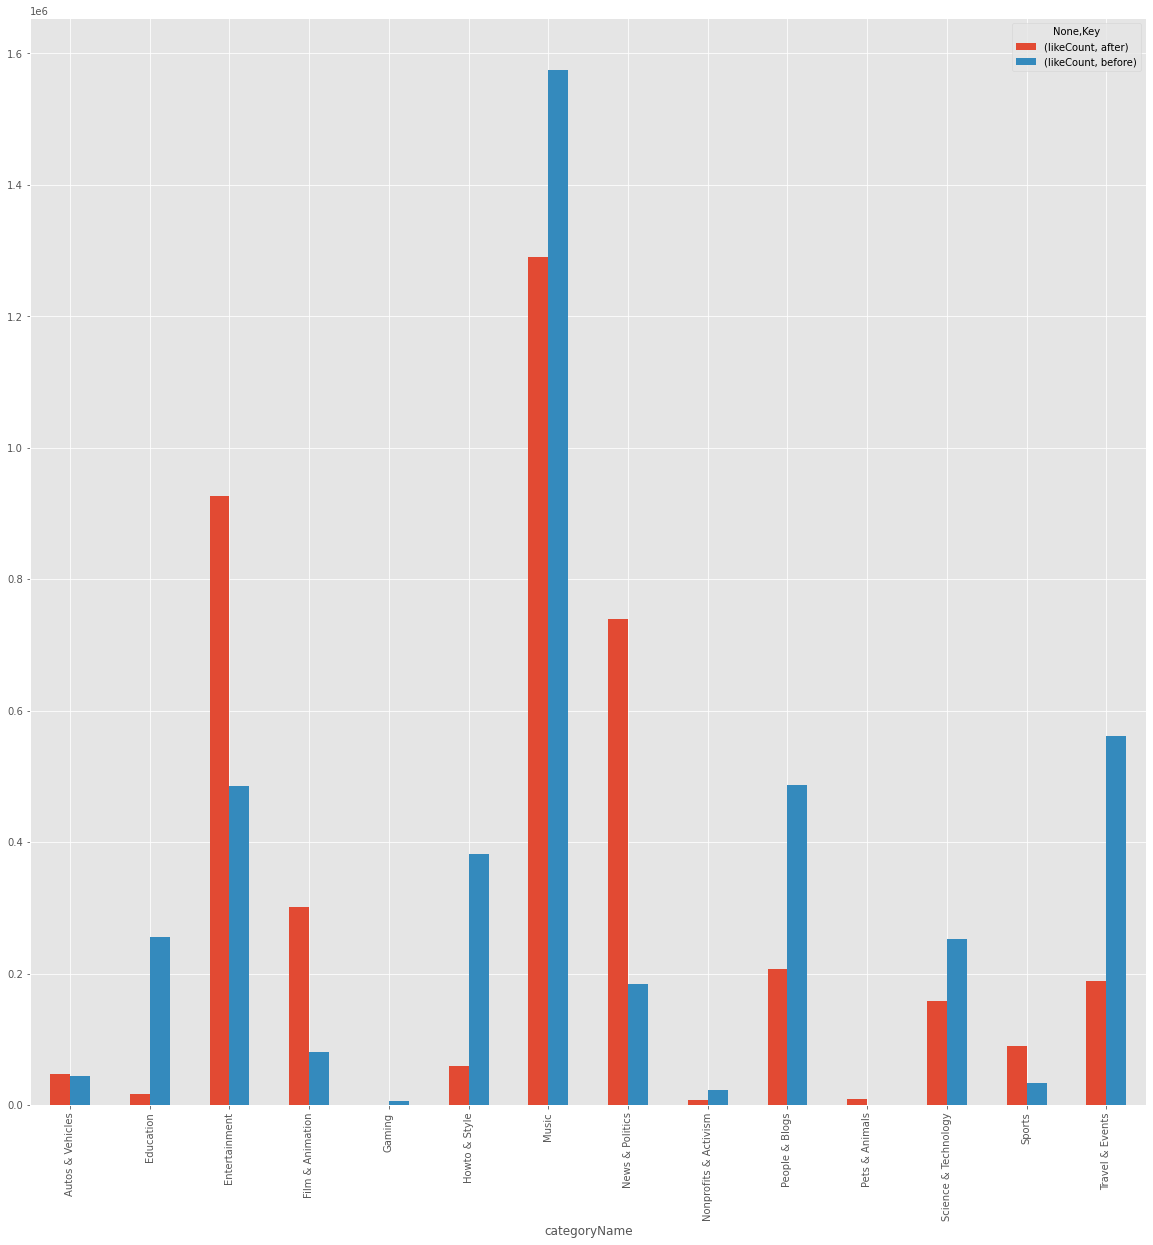

In [13]:
# compare category count according to viewcount
before_like_count['Key'] = 'before'
after_like_count['Key'] = 'after'
before_like_count['likeCount'] = pd.to_numeric(before_like_count['likeCount'])
after_like_count['likeCount'] = pd.to_numeric(after_like_count['likeCount'])

DF = pd.concat([before_like_count, after_like_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

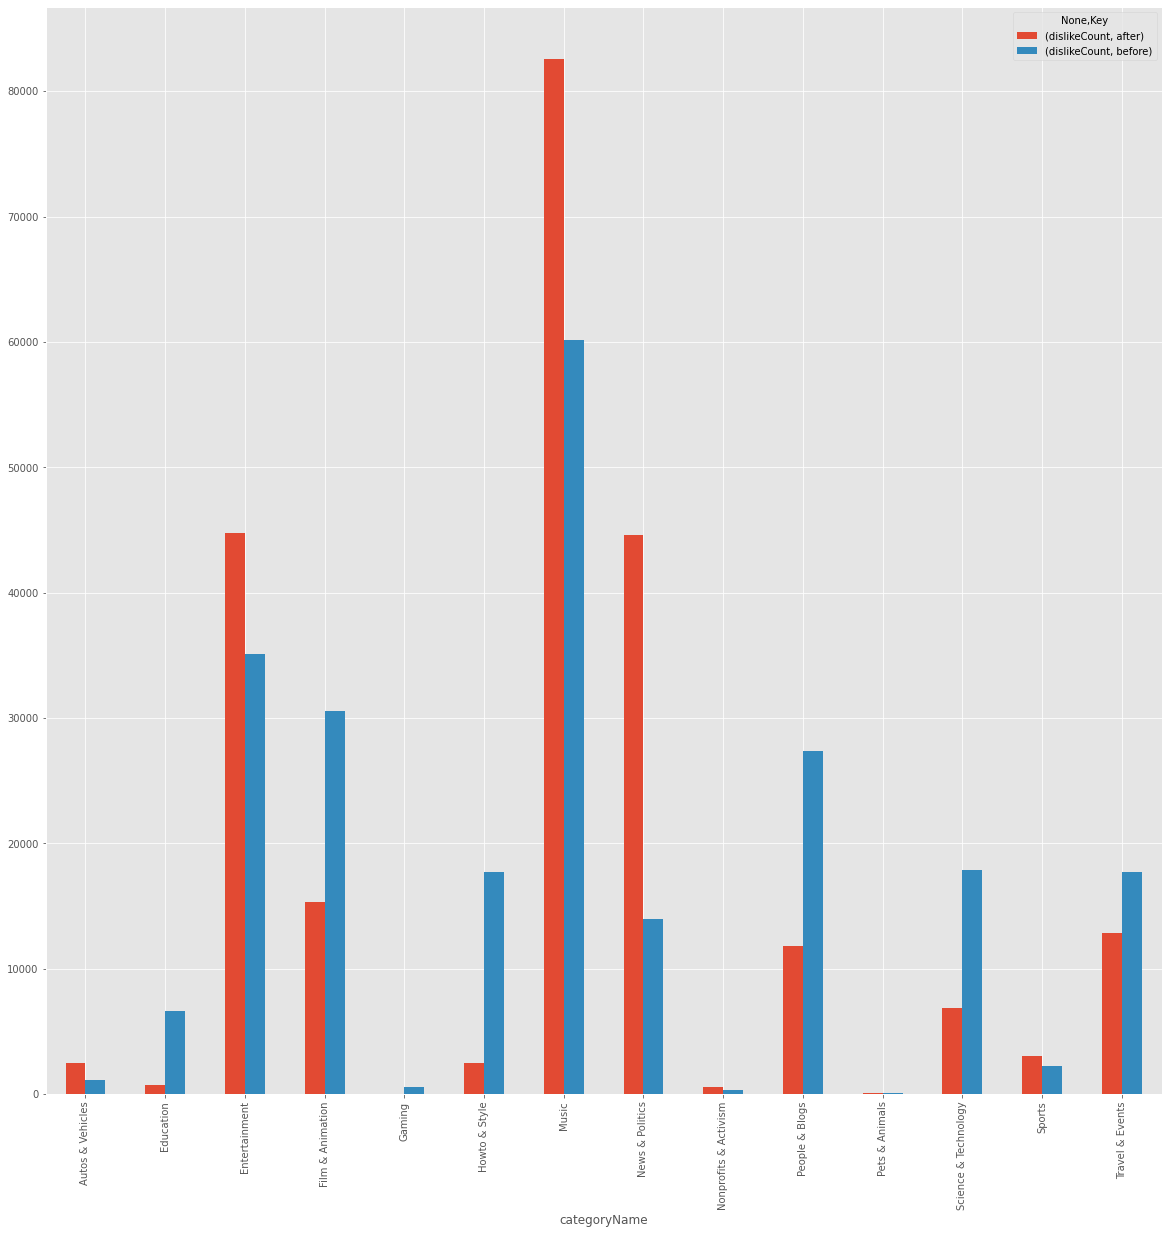

In [14]:
before_dislike_count['Key'] = 'before'
after_dislike_count['Key'] = 'after'
before_dislike_count['dislikeCount'] = pd.to_numeric(before_dislike_count['dislikeCount'])
after_dislike_count['dislikeCount'] = pd.to_numeric(after_dislike_count['dislikeCount'])

DF = pd.concat([before_dislike_count, after_dislike_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

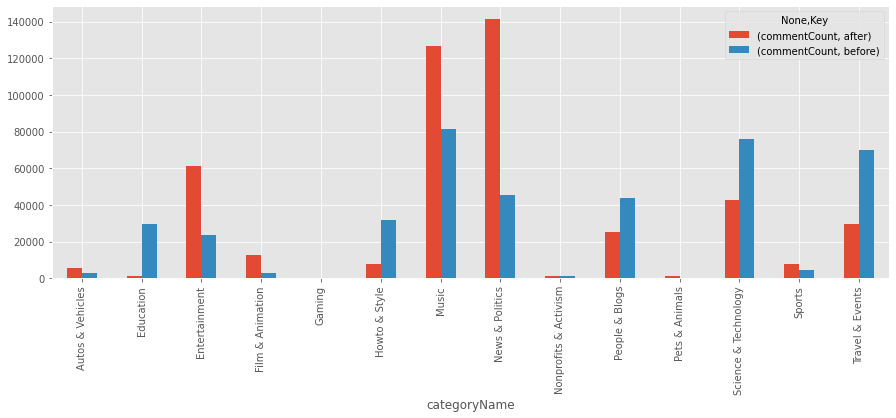

In [273]:
before_comment_count['Key'] = 'before'
after_comment_count['Key'] = 'after'
before_comment_count['commentCount'] = pd.to_numeric(before_comment_count['commentCount'])
after_comment_count['commentCount'] = pd.to_numeric(after_comment_count['commentCount'])

DF = pd.concat([before_comment_count, after_comment_count],keys=['before','after'])

DFGroup = DF.groupby(['categoryName','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')